<a href="https://colab.research.google.com/github/BhavnaKhu/Telecom/blob/main/Telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ydata_profiling
import numpy as np
#-----------------------------------
import pandas as pd
from ydata_profiling import ProfileReport

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 35.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=4f1d99c6a485bbee3374d91f79a5f837db330c00df526069d819c57f51247bc2
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows',None)
pd.set_option('mode.chained_assignment',None)
pd.set_option('display.float_format',lambda x: '%.2f' % x)
#------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import shapiro, probplot
#------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [3]:
!unzip '/content/Telecom-Churn.zip'

Archive:  /content/Telecom-Churn.zip
  inflating: sample_submission.csv   
  inflating: Churn_test.csv          
  inflating: Churn_train.csv         


In [4]:
data_tele_train = pd.read_csv('/content/Churn_train.csv')
data_tele_test = pd.read_csv('/content/Churn_test.csv')

In [5]:
data_tele_train.shape

(5634, 21)

In [6]:
data_tele_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [7]:
data_tele_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,No


**Which category has the highest proportion in the Sex column in train data?**

In [8]:
highest_pro = data_tele_train['gender'].value_counts(normalize=True)
print(highest_pro)

gender
Male     0.50
Female   0.50
Name: proportion, dtype: float64


**What is the maximum value in the MonthlyCharges column of the train data before preprocessing?**

In [9]:
max_monthly_charge = data_tele_train['MonthlyCharges'].max()
print(max_monthly_charge)

118.65



**Churn and Contract has strong Positive correlation**

**Label Encoding**

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
def labelEncoder(labelColumn):
    labelValues = labelColumn
    unique_labels = labelColumn.unique()
    le = LabelEncoder()
    labelColumn = le.fit_transform(labelColumn)
    print('Encoding Approach:')
    for i, j in zip(unique_labels, labelColumn[np.sort(np.unique(labelColumn, return_index=True)[1])]):
        print(f'{i}  ->  {j}')
    return labelColumn

In [12]:
categorical_variables = ["Contract", "Churn"]

for i in categorical_variables:
    print(f"For {i} column ")
    data_tele_train[f'{i}'] = labelEncoder(data_tele_train[f'{i}'])
    print("******************")

For Contract column 
Encoding Approach:
Two year  ->  2
One year  ->  1
Month-to-month  ->  0
******************
For Churn column 
Encoding Approach:
No  ->  0
Yes  ->  1
******************


In [13]:
data_tele_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,2,No,Mailed check,19.70,258.35,0
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,1,No,Credit card (automatic),73.90,3160.55,1
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,2,No,Bank transfer (automatic),65.15,4681.75,0
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,1,No,Electronic check,85.45,6300.85,0
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,1,No,Electronic check,70.40,2044.75,0


In [14]:
correlation = data_tele_train['Churn'].corr(data_tele_train['Contract'])
print(f'The correlation between Churn and Contract is{correlation:2f}')

The correlation between Churn and Contract is-0.397432



**What is the range of values (minimum to maximum) in the Tenure column of the train data before preprocessing?**

In [15]:
min_Tenure = data_tele_train['tenure'].min()
max_Tenure = data_tele_train['tenure'].max()

print(f' Minimum tenure = {min_Tenure}')
print(f'Maximun tenure ={max_Tenure}')

 Minimum tenure = 0
Maximun tenure =72



**Which original column has the highest positive correlation with the Churn column?**

In [16]:
correlation = data_tele_train['Churn'].corr(data_tele_train['Contract'])
print(f'The correlation between Churn and Contract is{correlation:2f}')

The correlation between Churn and Contract is-0.397432


In [17]:
unique_gender = data_tele_train['gender'].unique()

print(unique_gender)

['Male' 'Female']


In [18]:
unique_values = data_tele_train.nunique()

print(unique_values)

customerID          5634
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1494
TotalCharges        5291
Churn                  2
dtype: int64


In [19]:
data_tele_train['gender'] = data_tele_train['gender'].map({'Male': 1, 'Female': 0})
data_tele_train['Partner'] = data_tele_train['Partner'].map({'Yes': 1, 'No': 0})
data_tele_train['Dependents'] = data_tele_train['Dependents'].map({'Yes': 1, 'No': 0})
data_tele_train['PhoneService'] = data_tele_train['PhoneService'].map({'Yes': 1, 'No': 0})
data_tele_train['MultipleLines'] = data_tele_train['MultipleLines'].map({'Yes': 1, 'No': 0})


In [20]:
data_tele_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,1,0,1,1,12,1,0.00,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,2,No,Mailed check,19.70,258.35,0
1,6261-RCVNS,0,0,0,0,42,1,0.00,DSL,Yes,Yes,Yes,Yes,No,Yes,1,No,Credit card (automatic),73.90,3160.55,1
2,2176-OSJUV,1,0,1,0,71,1,1.00,DSL,Yes,Yes,No,Yes,No,No,2,No,Bank transfer (automatic),65.15,4681.75,0
3,6161-ERDGD,1,0,1,1,71,1,1.00,DSL,Yes,No,Yes,Yes,Yes,Yes,1,No,Electronic check,85.45,6300.85,0
4,2364-UFROM,1,0,0,0,30,1,0.00,DSL,Yes,Yes,No,Yes,Yes,No,1,No,Electronic check,70.40,2044.75,0


In [21]:
correlation = data_tele_train['Churn'].corr(data_tele_train['gender'])
print(f'The correlation between Churn and gender is{correlation:2f}')


The correlation between Churn and gender is-0.015329


In [22]:
data_temp= data_tele_train

In [23]:
data_tele_train.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [24]:
#data_temp['customerID'] = pd.to_numeric(data_temp['customerID'], errors= 'coerce')

In [25]:
data_temp.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,1,0,1,1,12,1,0.00,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,2,No,Mailed check,19.70,258.35,0
1,6261-RCVNS,0,0,0,0,42,1,0.00,DSL,Yes,Yes,Yes,Yes,No,Yes,1,No,Credit card (automatic),73.90,3160.55,1
2,2176-OSJUV,1,0,1,0,71,1,1.00,DSL,Yes,Yes,No,Yes,No,No,2,No,Bank transfer (automatic),65.15,4681.75,0
3,6161-ERDGD,1,0,1,1,71,1,1.00,DSL,Yes,No,Yes,Yes,Yes,Yes,1,No,Electronic check,85.45,6300.85,0
4,2364-UFROM,1,0,0,0,30,1,0.00,DSL,Yes,Yes,No,Yes,Yes,No,1,No,Electronic check,70.40,2044.75,0


In [26]:
data_temp = data_temp[['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService', 'Contract', 'MonthlyCharges', 'TotalCharges', 'Churn']]

In [27]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          5634 non-null   int64  
 1   SeniorCitizen   5634 non-null   int64  
 2   Partner         5634 non-null   int64  
 3   Dependents      5634 non-null   int64  
 4   tenure          5634 non-null   int64  
 5   PhoneService    5634 non-null   int64  
 6   Contract        5634 non-null   int64  
 7   MonthlyCharges  5634 non-null   float64
 8   TotalCharges    5634 non-null   object 
 9   Churn           5634 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 440.3+ KB


In [28]:
data_temp.isna().sum()

gender            0
SeniorCitizen     0
Partner           0
Dependents        0
tenure            0
PhoneService      0
Contract          0
MonthlyCharges    0
TotalCharges      0
Churn             0
dtype: int64

In [29]:
if data_temp['TotalCharges'].str.contains(' ').any():
  print("The DataFrame contains the string ' ' in the specified column.")

The DataFrame contains the string ' ' in the specified column.


In [30]:
data_temp['TotalCharges'].replace(' ',np.nan,inplace= True)

data_temp.dropna(subset=['TotalCharges'], inplace= True)

In [31]:
data_temp.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,MonthlyCharges,TotalCharges,Churn
gender,1.00,0.00,-0.00,0.01,0.01,-0.02,0.00,-0.02,0.00,-0.02
SeniorCitizen,0.00,1.00,0.01,-0.21,0.02,0.01,-0.14,0.22,0.11,0.14
Partner,-0.00,0.01,1.00,0.45,0.38,0.01,0.30,0.10,0.32,-0.14
Dependents,0.01,-0.21,0.45,1.00,0.16,-0.01,0.24,-0.12,0.06,-0.15
tenure,0.01,0.02,0.38,0.16,1.00,0.00,0.67,0.25,0.83,-0.35
PhoneService,-0.02,0.01,0.01,-0.01,0.00,1.00,0.00,0.25,0.11,0.02
Contract,0.00,-0.14,0.30,0.24,0.67,0.00,1.00,-0.08,0.45,-0.40
MonthlyCharges,-0.02,0.22,0.10,-0.12,0.25,0.25,-0.08,1.00,0.65,0.20
TotalCharges,0.00,0.11,0.32,0.06,0.83,0.11,0.45,0.65,1.00,-0.20
Churn,-0.02,0.14,-0.14,-0.15,-0.35,0.02,-0.40,0.20,-0.20,1.00


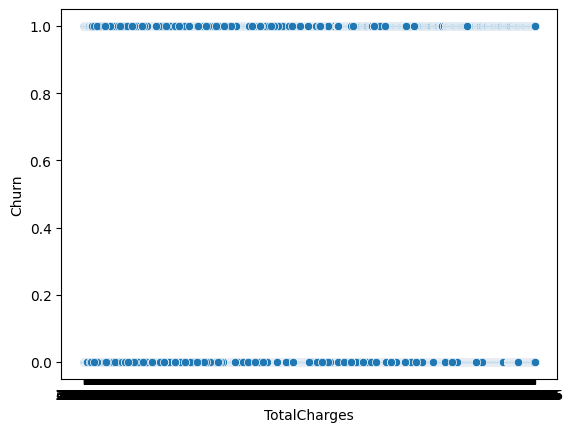

In [32]:
sns.scatterplot(x="TotalCharges", y="Churn", data=data_temp)
plt.show()

In [37]:
data_tele_test.shape

(1409, 20)

In [38]:
data_temp.shape

(5626, 10)

In [39]:
data_tele_train.shape

(5634, 21)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [41]:
x = data_temp.drop('Churn', axis =1)
y = data_temp['Churn']

In [42]:
x_train, x_test, y_train , y_test = train_test_split(x , y, test_size=0.2, random_state=120)

In [43]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (4500, 9)
y_train: (4500,)
x_test: (1126, 9)
y_test: (1126,)


In [44]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_hat_train_rf =  rf.predict(x_train)
y_hat_test_rf = rf.predict(x_test)

In [45]:
def model_eval(actual,predicted):
  cm = confusion_matrix(actual,predicted)
  print(accuracy_score(actual,predicted))
  print(cm)
  print(classification_report(actual, predicted))

In [46]:
model_eval(y_train, y_hat_train_rf)

0.9968888888888889
[[3290    8]
 [   6 1196]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3298
           1       0.99      1.00      0.99      1202

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500



In [47]:
model_eval(y_test, y_hat_test_rf)

0.7637655417406749
[[704 103]
 [163 156]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       807
           1       0.60      0.49      0.54       319

    accuracy                           0.76      1126
   macro avg       0.71      0.68      0.69      1126
weighted avg       0.75      0.76      0.76      1126



In [48]:
test_df = pd.DataFrame(data_tele_test)

In [49]:
test_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,8879-ZKJOF,Female,0,No,No,41,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75
1,0201-MIBOL,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85
2,1600-DILPE,Female,0,No,No,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35
3,8601-QACRS,Female,0,No,No,5,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95
4,7919-ZODZZ,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05


In [50]:
test_df = test_df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService', 'Contract', 'MonthlyCharges', 'TotalCharges']]

In [51]:
test_df['gender'] = test_df['gender'].map({'Male': 1, 'Female': 0})
test_df['Partner'] = test_df['Partner'].map({'Yes': 1, 'No': 0})
test_df['Dependents'] = test_df['Dependents'].map({'Yes': 1, 'No': 0})
test_df['PhoneService'] = test_df['PhoneService'].map({'Yes': 1, 'No': 0})

In [52]:
categorical_variables = ["Contract"]

for i in categorical_variables:
    print(f"For {i} column ")
    test_df[f'{i}'] = labelEncoder(test_df[f'{i}'])
    print("******************")

For Contract column 
Encoding Approach:
One year  ->  1
Two year  ->  2
Month-to-month  ->  0
******************


In [53]:
if test_df['TotalCharges'].str.contains(' ').any():
  print("The DataFrame contains the string ' ' in the specified column.")

The DataFrame contains the string ' ' in the specified column.


In [54]:
test_df['TotalCharges'].replace(' ',data_tele_train['TotalCharges'].max(),inplace= True)

In [55]:
test_df['TotalCharges'].max()

'999.9'

In [56]:
test_predictions = rf.predict(test_df)
print("Predicted Churn for the test set:")
print(test_predictions)

Predicted Churn for the test set:
[0 0 0 ... 0 0 0]


In [57]:
test_predictions.dtype

dtype('int64')

In [58]:
selected_df = pd.DataFrame(test_predictions)

In [59]:
selected_df.shape

(1409, 1)

In [60]:
selected_df.head()

,0
0,0
1,0
2,0
3,0
4,0


In [61]:
selected_df.columns

RangeIndex(start=0, stop=1, step=1)

In [62]:
selected_df.rename(columns={0: 'Churn'}, inplace=True)

In [63]:
test_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,MonthlyCharges,TotalCharges
0,0,0,0,0,41,1,1,79.85,3320.75
1,0,1,0,0,66,1,2,102.40,6471.85
2,0,0,0,0,12,1,0,45.00,524.35
3,0,0,0,0,5,1,0,50.60,249.95
4,0,0,1,1,10,1,1,65.90,660.05


In [74]:
combined_df = pd.concat([data_tele_test['customerID'], selected_df], axis=1)

In [77]:
combined_df.head()

,customerID,Churn
0,8879-ZKJOF,No
1,0201-MIBOL,No
2,1600-DILPE,No
3,8601-QACRS,No
4,7919-ZODZZ,No


In [76]:
combined_df['Churn'] = combined_df['Churn'].map({0: 'No', 1: 'Yes'})

In [78]:
combined_df.to_csv('submission.csv', index=False, header=False)